In [8]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

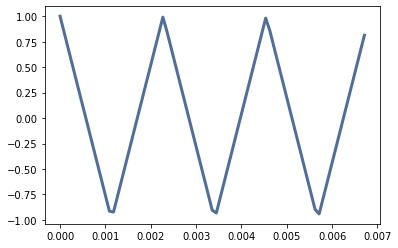

In [9]:
signal = thinkdsp.TriangleSignal()
signal.plot()

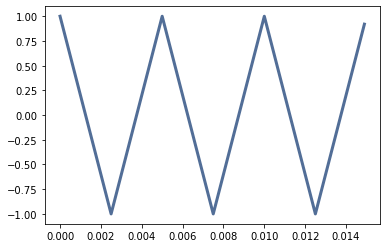

In [10]:
signal = thinkdsp.TriangleSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration,framerate=10000)
segment.plot()

In [11]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

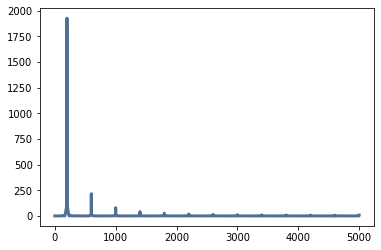

In [12]:
spectrum = wave.make_spectrum()
spectrum.plot()

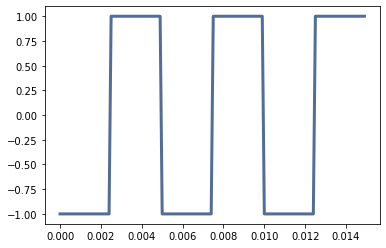

In [13]:
signal = thinkdsp.SquareSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration,framerate = 10000)
segment.plot()
thinkplot.config(ylin=[-1.05,1.05],legend=False)

In [14]:
wave = signal.make_wave(duration=0.5,framerate=10000)
wave.apodize()
wave.make_audio()

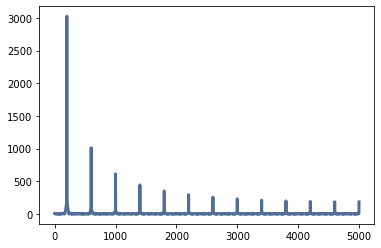

In [15]:
spectrum = wave.make_spectrum()
spectrum.plot()

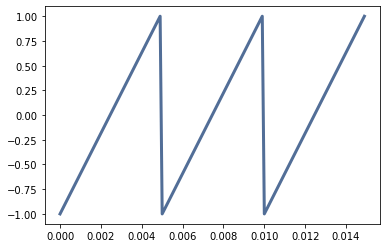

In [16]:
signal = thinkdsp.SawtoothSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate = 10000)
segment.plot()

In [18]:
wave = signal.make_wave(duration=0.5,framerate=10000)
wave.apodize()
wave.make_audio()

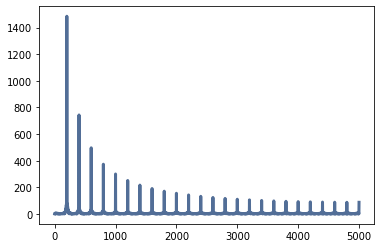

In [19]:
spectrum = wave.make_spectrum()
spectrum.plot()

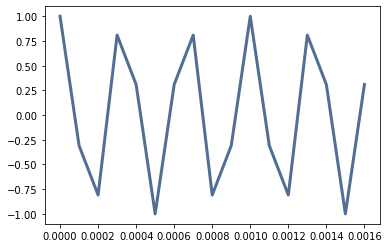

In [23]:
framerate =10000

signal = thinkdsp.CosSignal(3000)
duration = signal.period*5
segment = signal.make_wave(duration,framerate=framerate)
segment.plot()

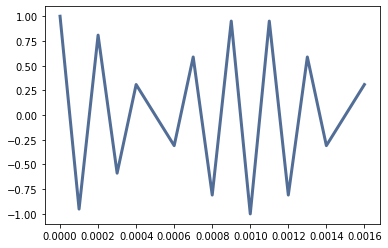

In [24]:
signal = thinkdsp.CosSignal(5500)
segment = signal.make_wave(duration,framerate=framerate)
segment.plot()

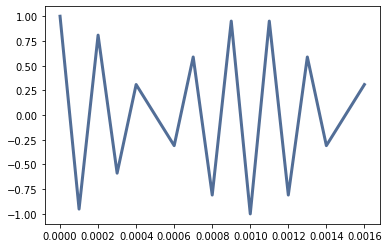

In [26]:
signal = thinkdsp.CosSignal(4500)
segment = signal.make_wave(duration,framerate=framerate)
segment.plot()

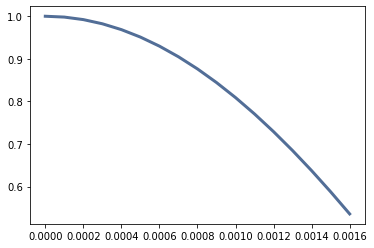

In [27]:
signal = thinkdsp.CosSignal(9900)
segment = signal.make_wave(duration,framerate=framerate)
segment.plot()

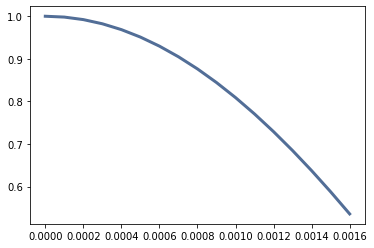

In [28]:
signal = thinkdsp.CosSignal(100)
segment = signal.make_wave(duration,framerate=framerate)
segment.plot()

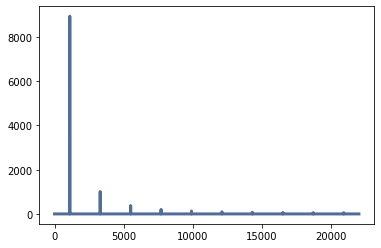

In [29]:
signal = thinkdsp.TriangleSignal(1100)
segment = signal.make_wave(duration=0.5,framerate=44000)
#44000이니까 22000까지 볼 수 있다.
spectrum = segment.make_spectrum()
spectrum.plot()

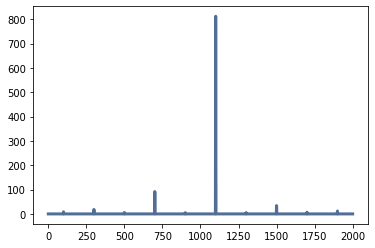

In [30]:
signal = thinkdsp.TriangleSignal(1100)
segment = signal.make_wave(duration=0.5,framerate=4000)
# 2000까지 관찰 가능, 1100, 2200인데 2200은 2000에서 짤리는 aliasing발생,
# 3300은 2000에서 1300떨어져 있음.
# 2000 - 1300 해서 folding돼서, 700에서 나타나는 에얼리어싱 발생 -> 하모닉스를 안이뤄서 귀에 거슬리게됨
spectrum = segment.make_spectrum()
spectrum.plot()

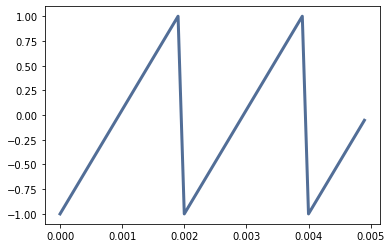

In [33]:
signal =  thinkdsp.SawtoothSignal(500)
wave = signal.make_wave(duration=1, framerate = 10000)
segment=wave.segment(duration=0.005)
segment.plot()

In [34]:
import numpy as np

hs = np.fft.rfft(wave.ys)
hs

array([ 5.11590770e-13+0.00000000e+00j,  2.19700679e-13-1.34559298e-13j,
       -2.09548671e-13-6.74603523e-14j, ...,
        4.19606174e-13+3.46000979e-14j, -5.63280756e-13+5.74915022e-14j,
       -5.26315789e+02+0.00000000e+00j])

In [35]:
n = len(wave.ys)
d = 1/wave.framerate
fs = np.fft.rfftfreq(n,d)
n,fs

#sampling rate이 10000이니까 5000까지 측정( ~~ 5.000e+03])

(10000,
 array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.998e+03, 4.999e+03,
        5.000e+03]))

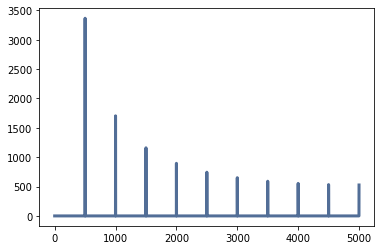

In [38]:
magnitude = np.absolute(hs)
thinkplot.plot(fs,magnitude)

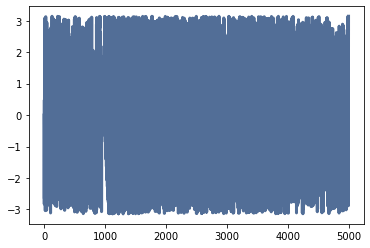

In [39]:
angle = np.angle(hs)#어디에서 시작하는지 구별하기 위해서 angle도입
thinkplot.plot(fs,angle)

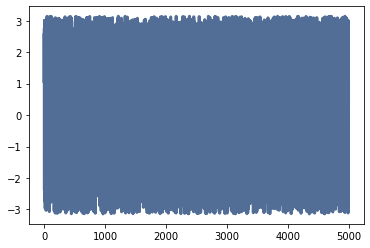

In [40]:
import random
random.shuffle(angle)
thinkplot.plot(fs,angle)

In [41]:
i = complex(0,1)
spectrum = wave.make_spectrum()
spectrum.hs = magnitude * np.exp(i*angle)

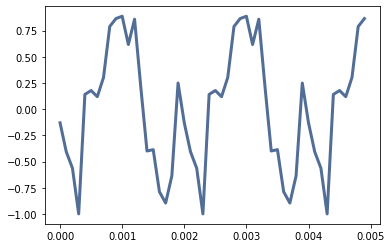

In [42]:
wave2 = spectrum.make_wave()
wave2.normalize()
segment = wave2.segment(duration=0.005)
segment.plot()

In [43]:
wave2.make_audio()

In [44]:
wave.make_audio()